In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib as mpl

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [60]:
mpl.rcParams['xtick.labelsize'] = 40
mpl.rcParams['ytick.labelsize'] = 40
mpl.rcParams['font.size'] = 40
mpl.rcParams['figure.figsize'] =  15,10
mpl.rcParams['axes.labelsize'] = 40
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 2.5

In [37]:
import numpy as np

In [356]:
data = []
with open('Data-GT/stock_3/all_results_use') as fs:
    for line in fs:
        temp = line.strip().split('\t')
        data.append(temp[1:])

In [357]:
data = np.array(data,dtype=np.float)

In [358]:
data.shape

(10, 7)

In [315]:
data

array([[ 2.79880173e+00,  2.79089096e+00,  2.52036416e-01,
         1.66964305e-01,  6.68711813e-02,  3.11000000e-01,
         7.44000000e-01],
       [ 3.42796961e+00,  3.42749045e+00,  2.62098706e-01,
         1.80036865e-01,  6.14920391e-02,  2.57000000e-01,
         1.06500000e+00],
       [ 4.55168448e+00,  4.47454025e+00,  2.80067082e-01,
         1.73598198e-01,  4.43137381e-02,  2.33000000e-01,
         1.24000000e+00],
       [ 8.54830912e-02,  6.19786601e-02,  1.71058936e-01,
         1.72674589e-02,  1.33935990e-03, -5.30000000e-01,
         5.60000000e-01],
       [ 2.60842941e+00,  2.59716454e+00,  2.47244849e-01,
         1.68339743e-01,  6.85357363e-02,  3.30000000e-01,
         7.02000000e-01],
       [ 3.45511319e+00,  3.45367572e+00,  2.54432199e-01,
         1.74794073e-01,  6.01472107e-02,  2.90000000e-01,
         9.75000000e-01],
       [ 4.58744323e+00,  4.32103212e+00,  2.78629612e-01,
         1.71180187e-01,  4.02037647e-02,  2.40000000e-01,
         1.1690000

In [162]:
#data = np.loadtxt('Data-GT/Whitewine/results_to_plot',delimiter='	')
data = np.loadtxt('Data-GT/MNIST/all_results_use',delimiter='  ')

In [163]:
data.shape

(10, 7)

In [175]:
data[:,2]

array([0.29565217, 0.3826087 , 0.92173913, 0.87826087, 0.86956522,
       0.86086957, 0.73913043, 0.77391304, 0.77391304, 0.44347826,
       0.33043478, 0.37391304, 0.93043478, 0.86086957, 0.86956522,
       0.83478261, 0.8173913 , 0.86956522, 0.77391304, 0.48695652,
       0.93043478, 0.86086957, 0.83478261, 0.54782609])

In [361]:
labels = []
with open('Data-GT/stock_3/all_labels') as fs:
    for line in fs:
        labels.append(line.strip())

In [362]:
len(labels)

10

In [296]:
data[:,2]

array([2.49515166, 4.67516351, 4.73859601, 4.11998956, 2.0671085 ,
       0.41128779, 4.90634442, 4.95123568, 4.52425003, 1.34357509,
       5.1069747 , 0.85799307])

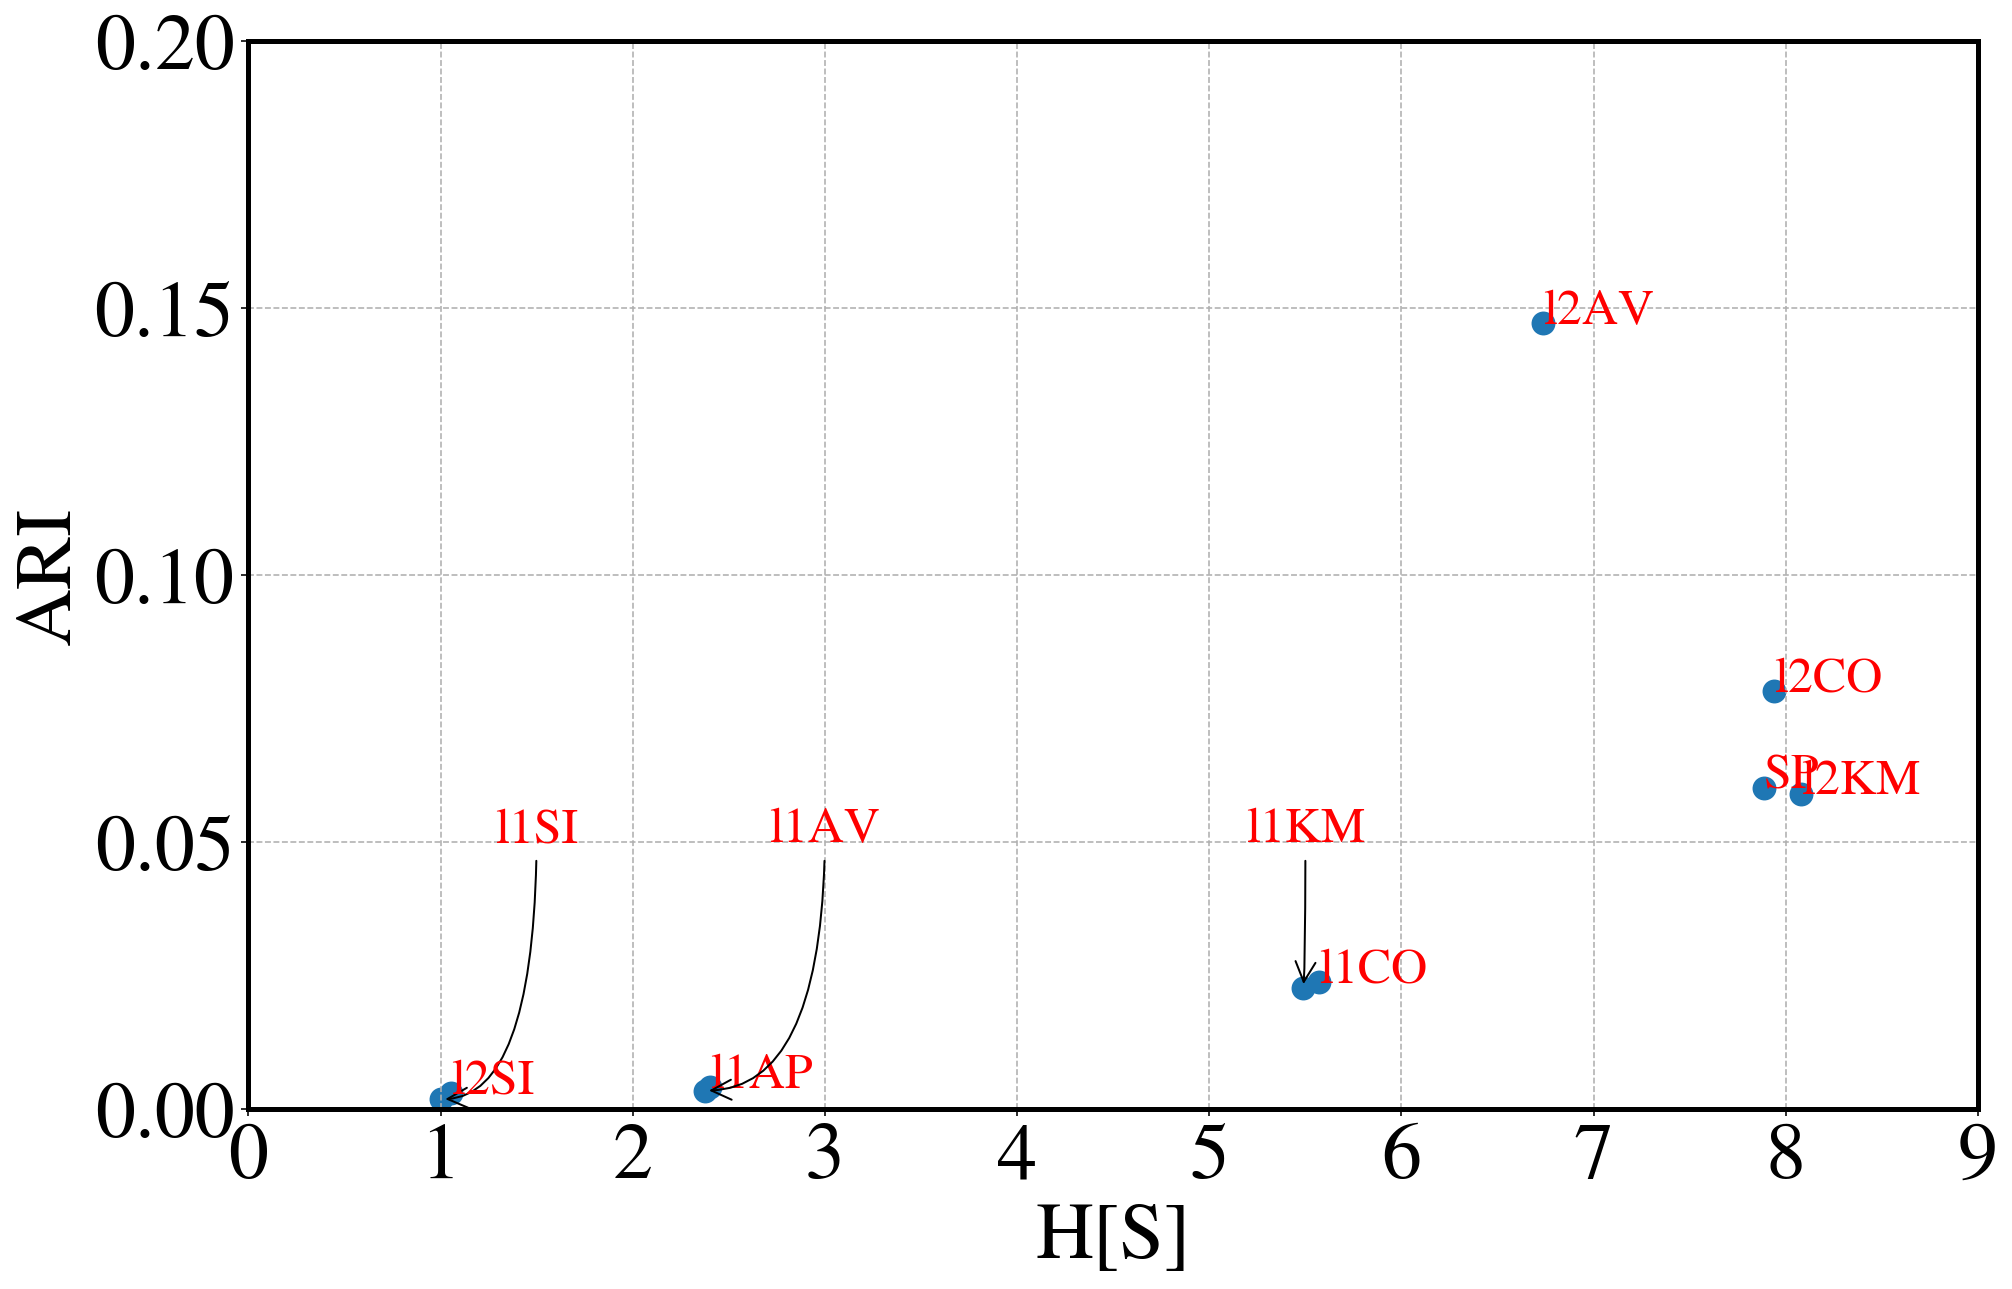

In [368]:
fig, ax = plt.subplots()
plt.grid(linestyle='--')

plt.ylim(0,0.2)
y_pos = np.arange(0,0.25,step = 0.05)
ax.set_yticks(y_pos)
plt.xlim(0,9)
x_pos = np.arange(0,10,step = 1)
ax.set_xticks(x_pos)
plt.ylabel('ARI')
plt.xlabel('H[S]')
ax.scatter(data[:,0],data[:,4],s=120)
target_location = [(0,0),(3,0.05),(4.2,0.29),(5.5,0.05),(1.5,0.05),(0,0),(4.2,0.25),(5.5,0.05),(7.5,0.7),(1.5,0.2),0,(6.5,0.2)]

for i, txt in enumerate(labels):
    if 'l2SI' in txt or 'AP' in txt or 'SP' in txt or 'CO' in txt or 'l2AV' in txt or 'l2KM' in txt or 'BI' in txt:
        ax.annotate(txt, (data[i,0], data[i,4]), color='r', fontsize=25)
    else:
        ax.annotate(txt, (data[i,0], data[i,4]), target_location[i],
                   arrowprops=dict(arrowstyle="->", connectionstyle="angle3", lw=1),
                    color='r', fontsize=25, ha='center')

plt.tight_layout()
plt.savefig('Plots_new/stock_3_ARI.pdf',dpi=200)    

In [181]:
labels

['l1APno',
 'l1APsp',
 'l1AVno',
 'l1AVsp',
 'l1COno',
 'l1COsp',
 'l1KMno',
 'l1KMsp',
 'l1SIno',
 'l1SIsp',
 'l2APno',
 'l2APsp',
 'l2AVno',
 'l2AVsp',
 'l2COno',
 'l2COsp',
 'l2KMno',
 'l2KMsp',
 'l2SIno',
 'l2SIsp',
 'BIno',
 'BIsp',
 'SPno',
 'SPsp']

In [106]:
from matplotlib.lines import Line2D

In [107]:
custom_lines = [Line2D([0], [0], color='r', lw=2),
                Line2D([0], [0], color='b', lw=2)]

In [288]:
target_location= [0 for _ in range(24)]
target_location[0] = (0.2,0.05)
target_location[1] = (0.5,0.05)
target_location[2] = (1,-0.025)
target_location[3] = (1,0)
#target_location[4] = (2.5,0.9)
#target_location[5] = (2.2,0.5)
target_location[10] = (2,0.1)
target_location[11] = (1.5,0.10)
target_location[12] = (2.5,0.1)
target_location[13] = (2,0.1)
#target_location[14] = (2.5,0.5)
#target_location[15] = (2.7,0.5)
#target_location[21] = (2.9,0.5)
#target_location[17] = (3.8,0.5)
#target_location[16] = (3.8,0.6)
#target_location[18] = (3.5,0.6)
#target_location[9] = (2.8,0.9)

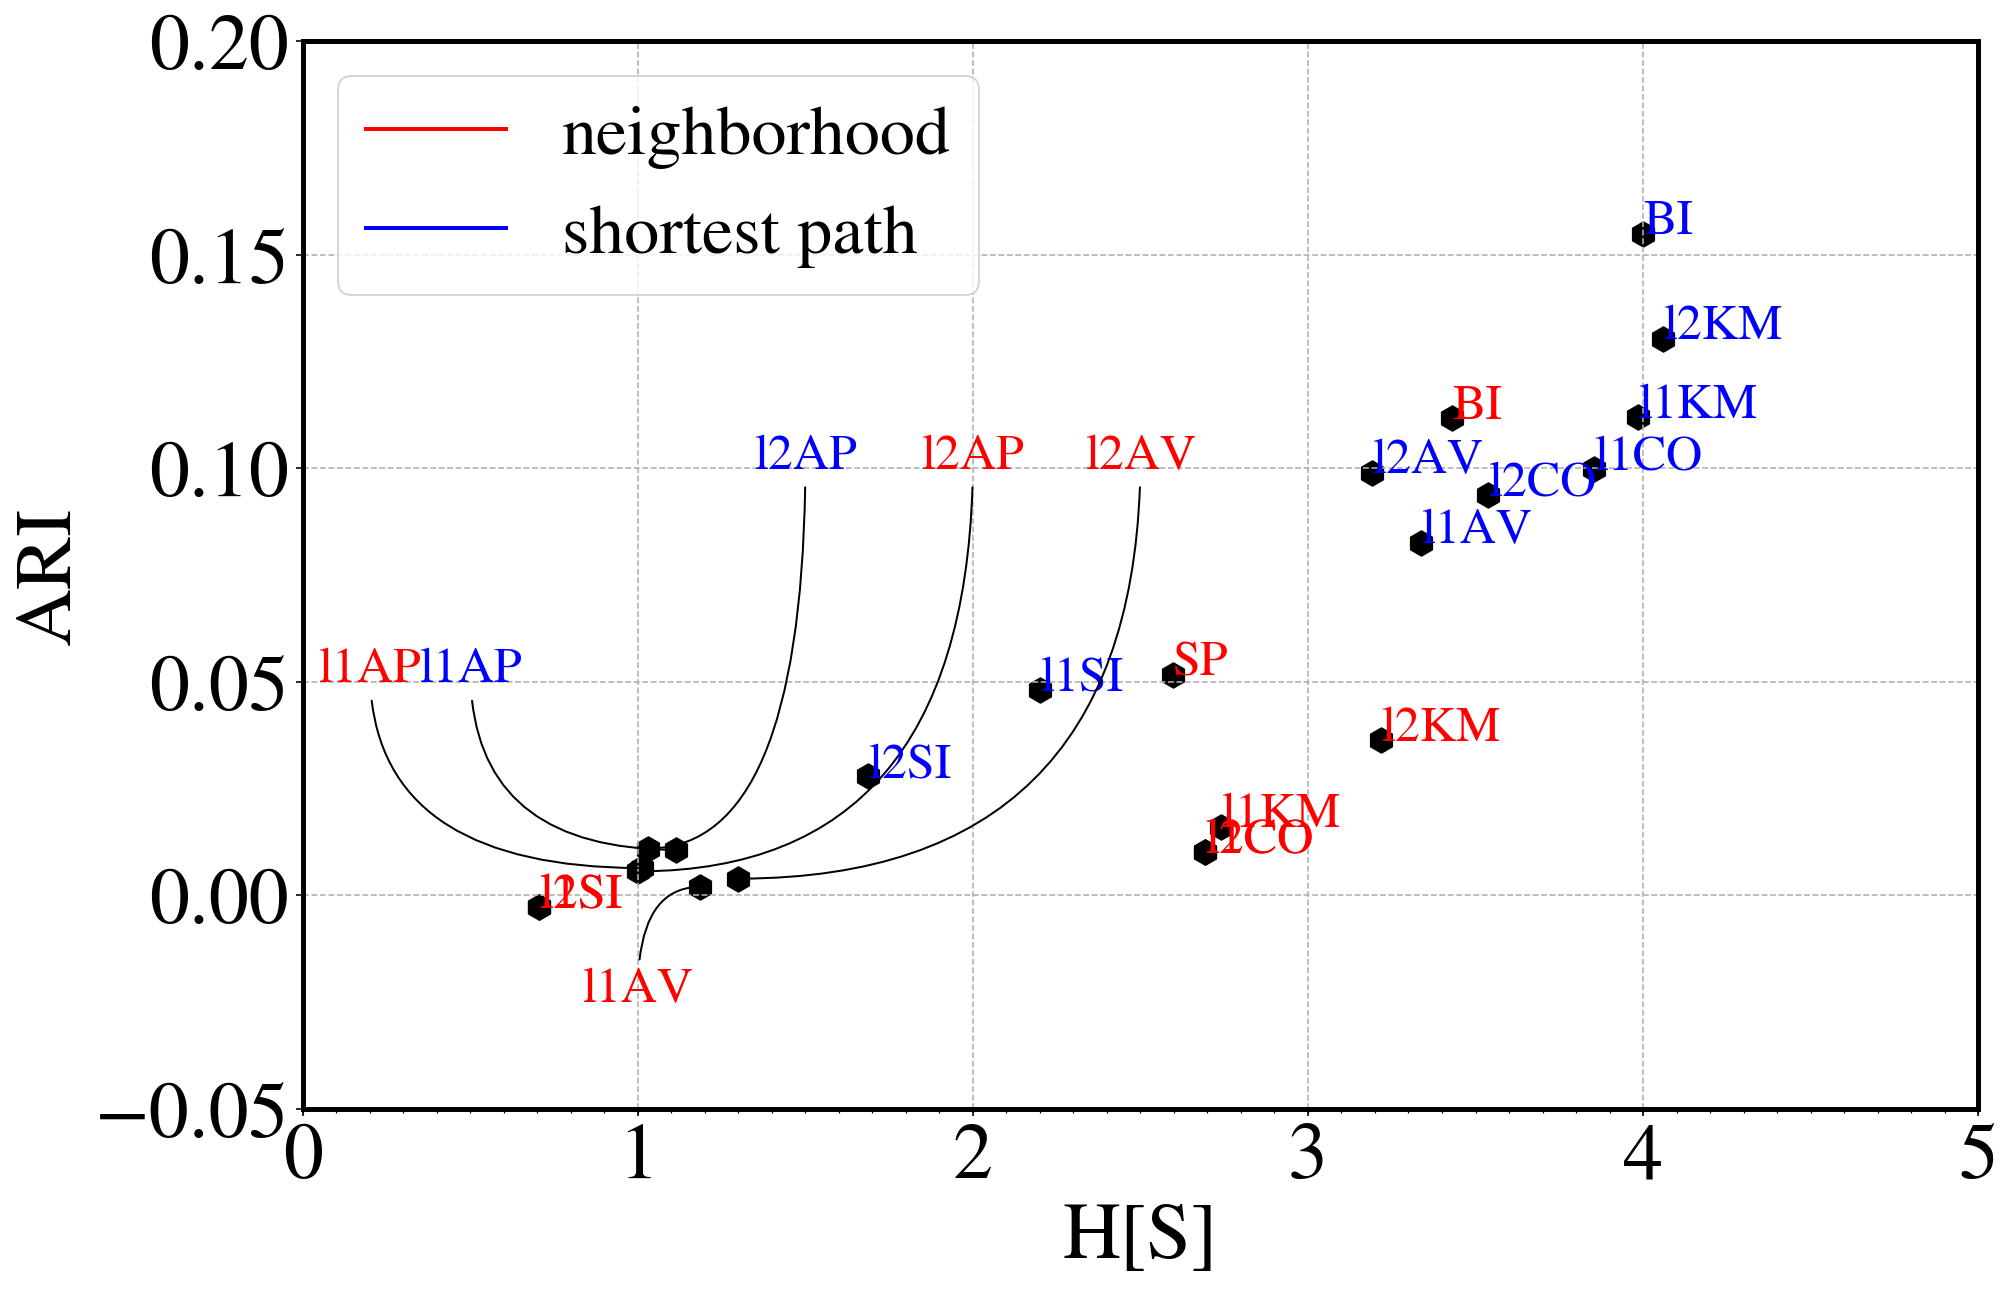

In [289]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--')

plt.ylim(-0.05,0.2)
y_pos = np.arange(-0.05,0.25,step = 0.05)
ax.set_yticks(y_pos)
plt.xlim(0,5)
x_pos = np.arange(0,6,step = 1)
#print(x_pos)
ax.set_xticks(x_pos)
plt.ylabel('ARI')
plt.xlabel('H[S]')
ax.legend(custom_lines, ['neighborhood', 'shortest path'],loc = 'upper left',fontsize=35)
ax.scatter(data[:,0],data[:,4],s=150,marker='h',color='k')

for i, txt in enumerate(labels):
    if 'sp' in txt:
        if 'AVx' in txt or 'AP' in txt:
            ax.annotate(txt.replace('sp',''), (data[i,0], data[i,4]), target_location[i],
                        arrowprops=dict(arrowstyle="-", connectionstyle="angle3", lw=1),
                        color='b', fontsize=25, ha='center')
        else:
            ax.annotate(txt.replace('sp',''), (data[i,0], data[i,4]), color='b', fontsize=25)
    else:
        if 'AV' in txt or 'AP' in txt:
            ax.annotate(txt.replace('no',''), (data[i,0], data[i,4]), target_location[i],
                        arrowprops=dict(arrowstyle="-", connectionstyle="angle3", lw=1),
                        color='r', fontsize=25, ha='center')
        else:
            ax.annotate(txt.replace('no',''), (data[i,0], data[i,4]), color='r', fontsize=25)
        #ax.annotate(txt.replace('no',''), (data[i,0], data[i,2]), color='r', fontsize=25)

plt.tight_layout()
plt.savefig('Plots_new/rail_ARI.pdf',dpi=200)    

In [22]:
H_sig = [0.34, 0.52, 0.47, 0.16, 0.15, 0.62, 0.28, 0.45, 0.47, 0.42, 0.56, 0.30, 0.33, 0.41, 0.18]
H_s = [0.65, 0.62, 0.89, 0.56, 0.53, 0.76, 0.52, 0.70, 0.82, 0.79, 0.91, 0.75, 0.85, 0.78, 0.82]

In [23]:
len(H_sig)

15

In [24]:
len(H_s)

15

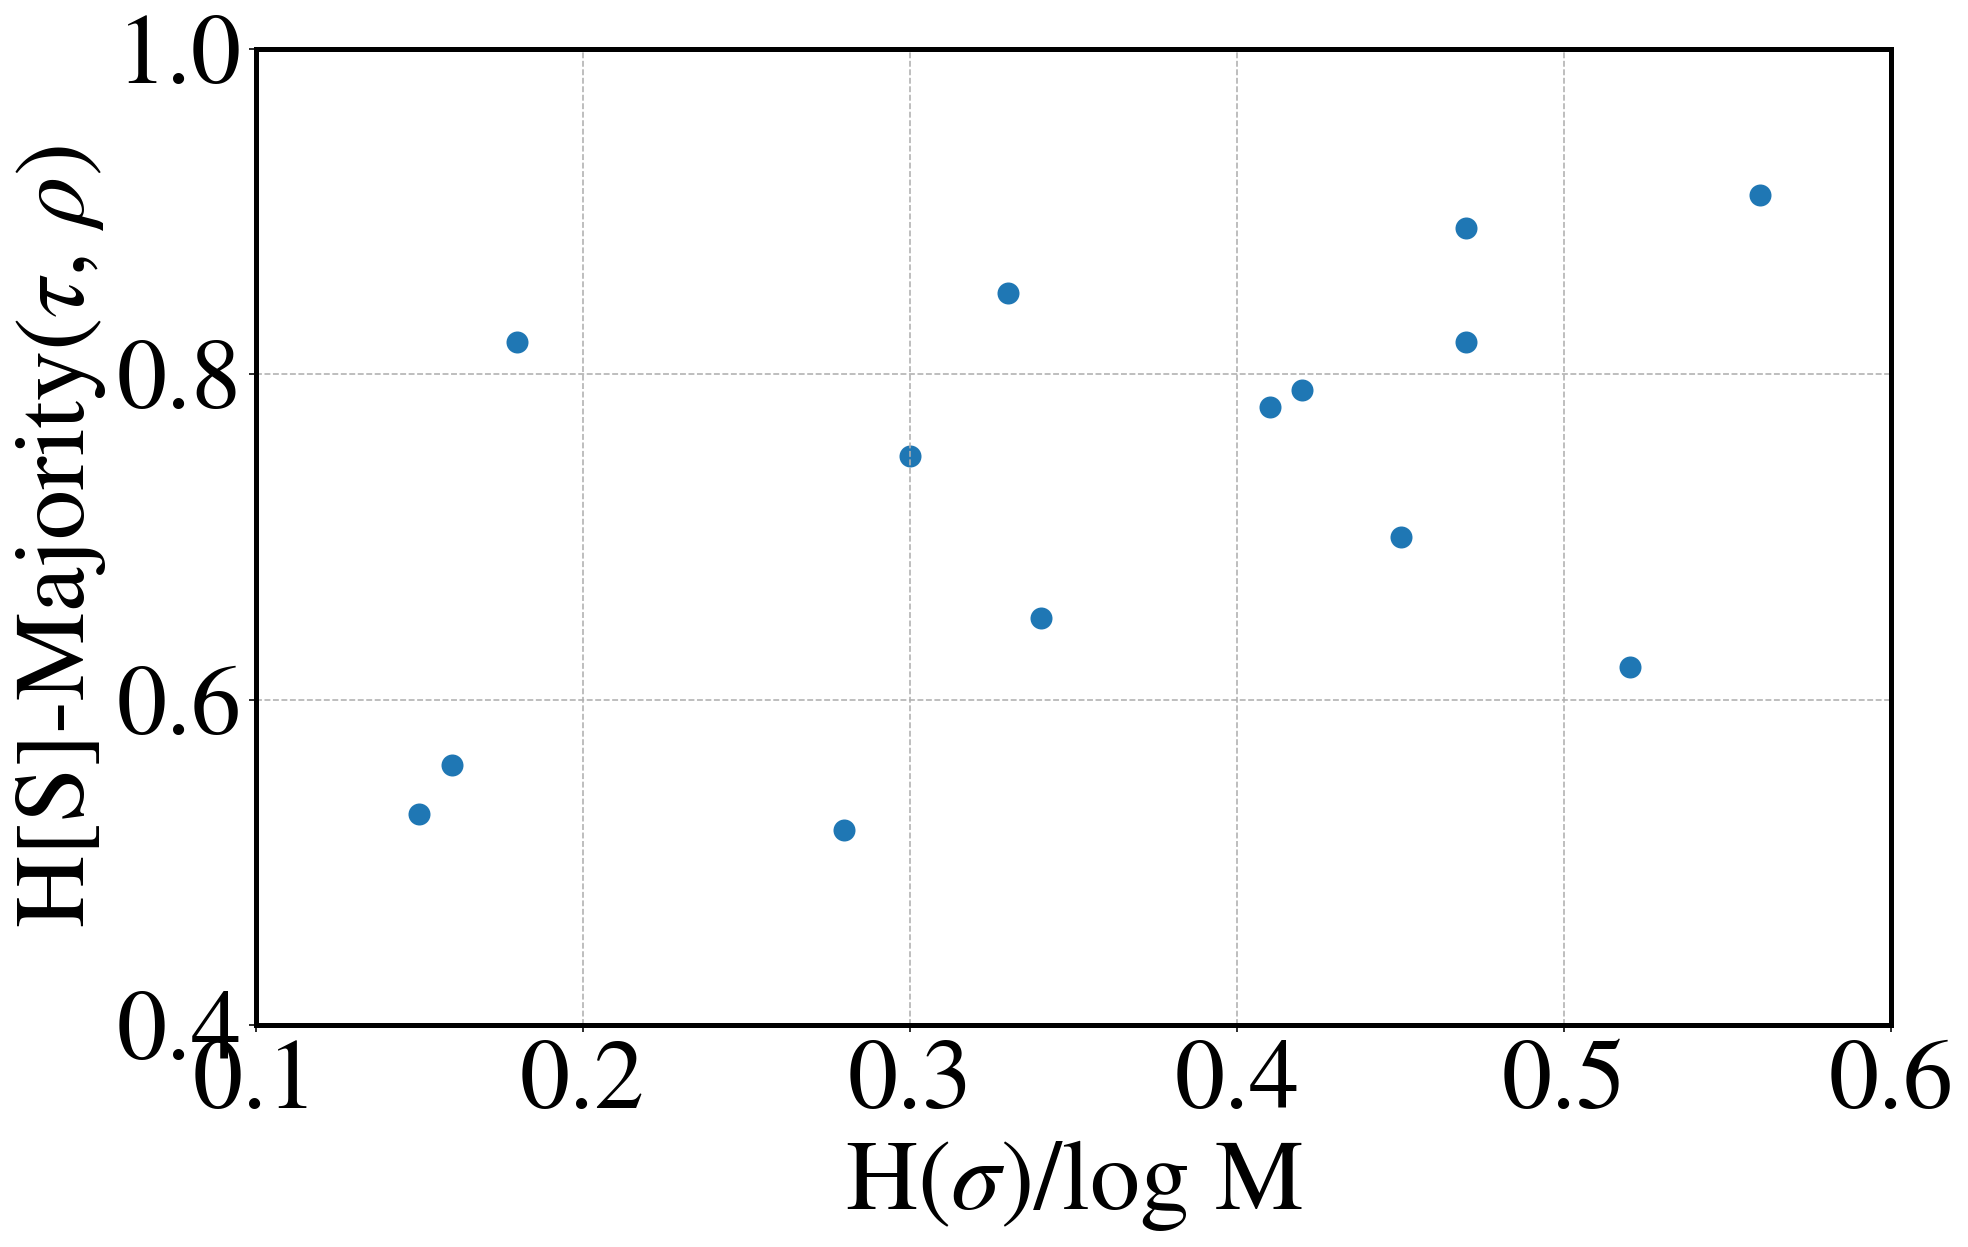

In [36]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.xaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--')

plt.xlim(0.1,0.6)
x_pos = np.arange(0.1,0.7,step = 0.1)
#print(x_pos)
ax.set_xticks(x_pos)

plt.ylim(0.4,1.0)
y_pos = np.arange(0.4,1.2,step = 0.2)
ax.set_yticks(y_pos)

plt.xlabel(r'H($\sigma$)/log M')
plt.ylabel(r'H[S]-Majority($\tau$, $\rho$)')

ax.scatter(H_sig,H_s,s=100)

plt.tight_layout()
plt.savefig('plots/summary.pdf',dpi=200)

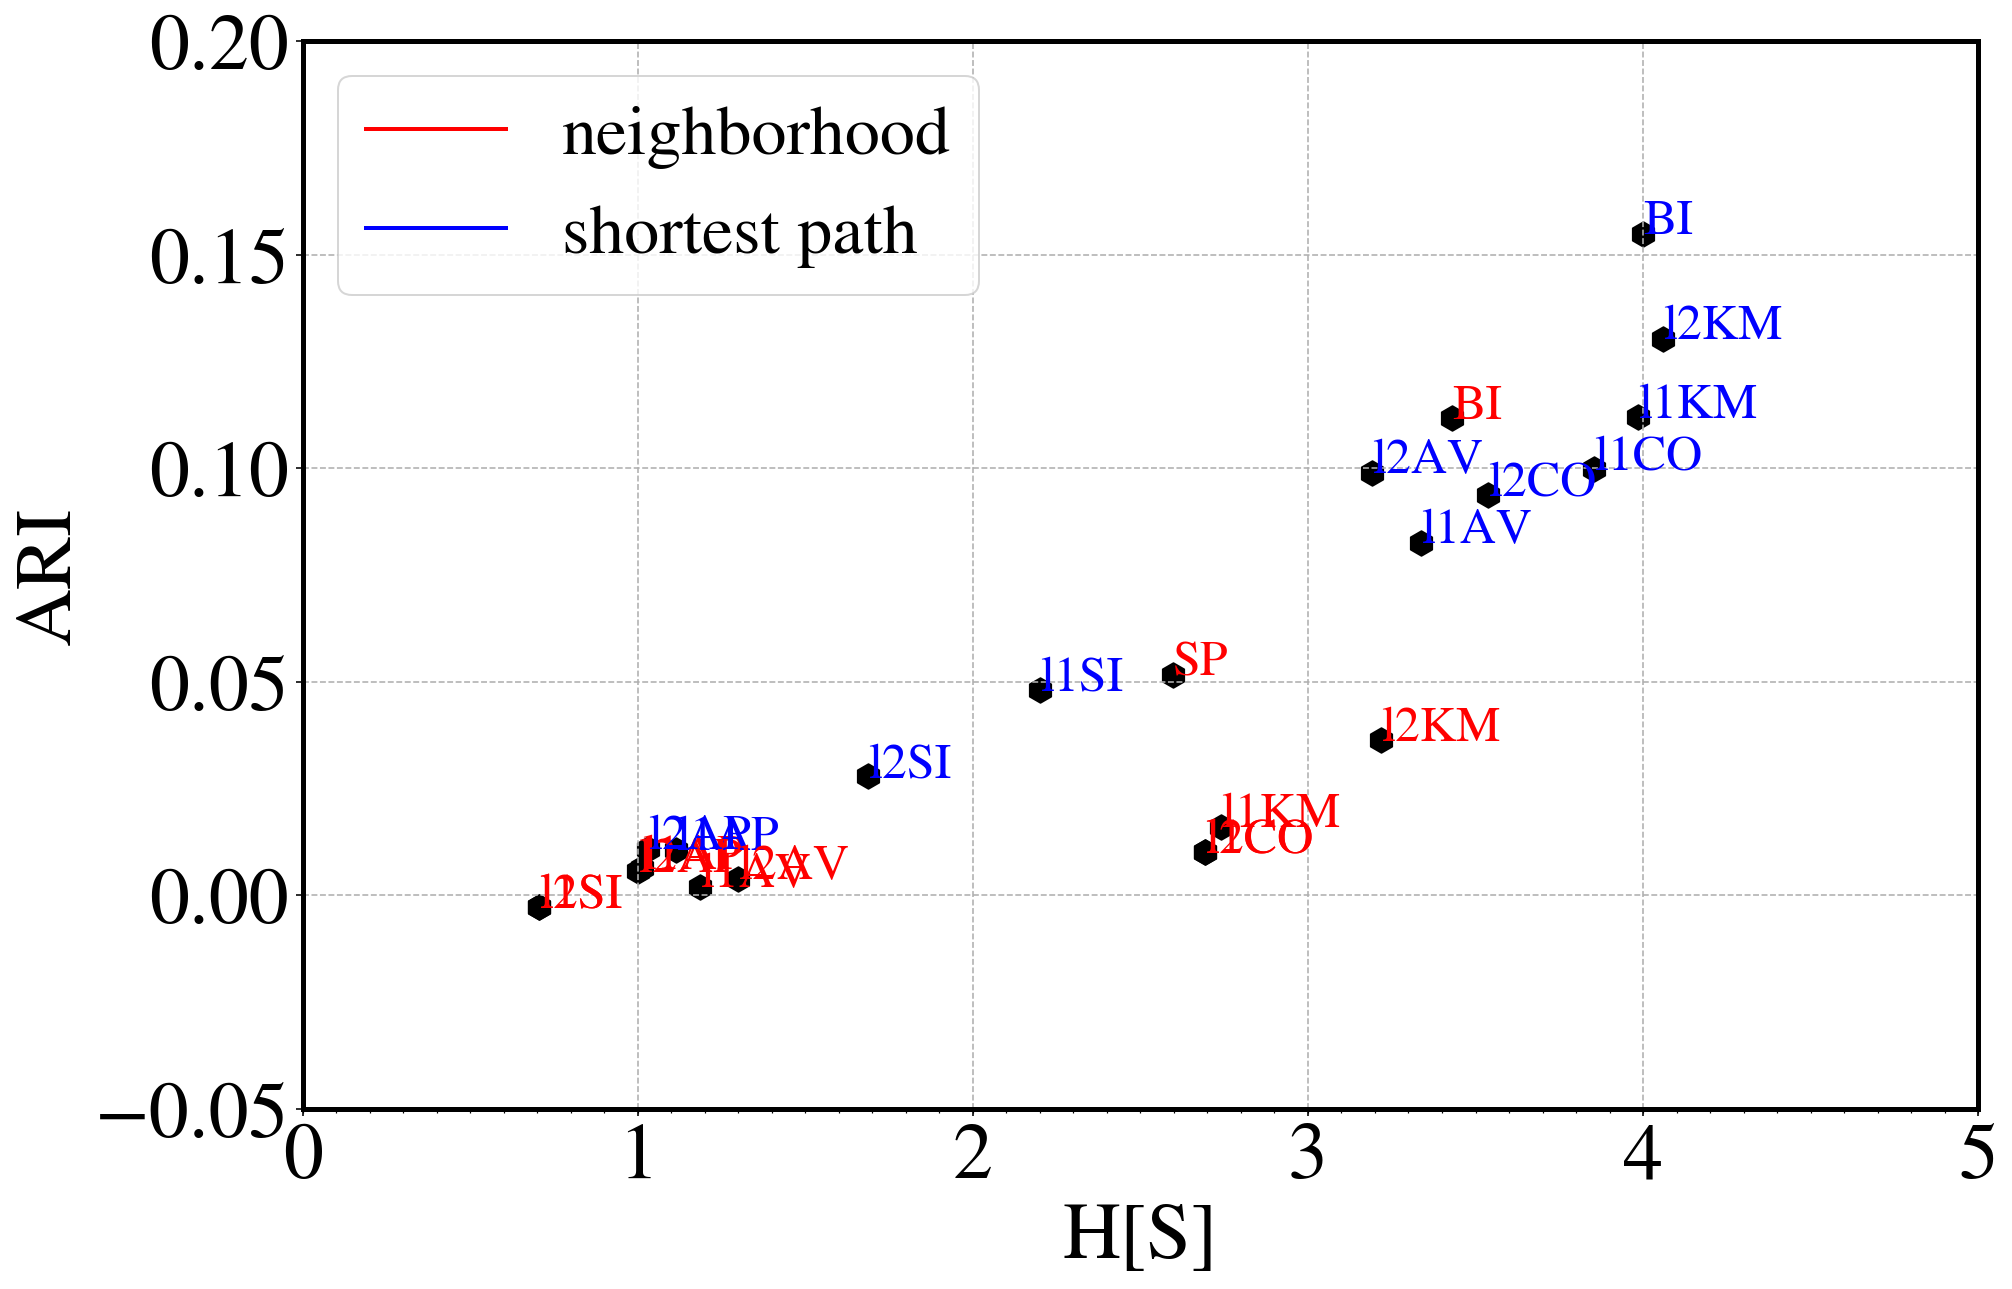

In [258]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--')

plt.ylim(-0.05,0.2)
y_pos = np.arange(-0.05,0.25,step = 0.05)
ax.set_yticks(y_pos)
plt.xlim(0,5)
x_pos = np.arange(0,6,step = 1)
#print(x_pos)
ax.set_xticks(x_pos)
plt.ylabel('ARI')
plt.xlabel('H[S]')
ax.legend(custom_lines, ['neighborhood', 'shortest path'],loc = 'upper left',fontsize=35)
ax.scatter(data[:,0],data[:,4],s=150,marker='h',color='k')

for i, txt in enumerate(labels):
    if 'sp' in txt:
        ax.annotate(txt.replace('sp',''), (data[i,0], data[i,4]), color='b', fontsize=25)
    else:
        
        ax.annotate(txt.replace('no',''), (data[i,0], data[i,4]), color='r', fontsize=25)
        #ax.annotate(txt.replace('no',''), (data[i,0], data[i,2]), color='r', fontsize=25)

plt.tight_layout()
plt.savefig('Plots_new/rail_ARI.pdf',dpi=200)